In [3]:
import urllib.request
import json
import pandas as pd
import datetime
import time

In [4]:
# 일별 박스오피스 30일치 가져오기
def cineBoxInfo():
    # 오늘 날짜를 가져와서 사용할 형식으로 만들기
    movieDate = time.strftime('%Y%m%d', time.localtime(time.time()))
    cine = []
    for i in range(0, 30):
        # 자료는 매일 갱신되며 갱신 시간 이전에 요청 시 내용이 비어 있음
        # str -> date
        datetime_obj = datetime.datetime.strptime(movieDate, '%Y%m%d').date()
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)
        # date -> str
        movieDate = datetime_obj_tmp.strftime('%Y%m%d')
        print(movieDate, end=' ')
        
        # key=에 발급받은 키값을 넣어줌
        url = f'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=c1259d1034a8d753877bf1eac2f78cc9&targetDt={movieDate}'
        response = urllib.request.urlopen(url)
        rescode = response.getcode()
        if (rescode == 200):  # 코드값이 200, 400.. 있는데 200이면 코드 가져오는 데 성공한 것
            responseData = response.read()
            
        result = json.loads(responseData)
        pre_result = result['boxOfficeResult']['dailyBoxOfficeList']
        
        for i in range(0, len(pre_result)):
            pre_result[i]['targetDt'] = movieDate
            cine.append(pre_result[i])
            
    columns = ['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm', 'openDt', 'targetDt', 'salesAmt', 'salesShare',
              'salesInten', 'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt', 'showCnt']
    
    dataframe = pd.DataFrame(cine, columns=columns)
    dataframe.to_csv('cinebox.csv', index=False)
    return dataframe

# 영화 코드값을 받아서 영화 상세정보 리턴
def cineInfo(movieCd):
    url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=c1259d1034a8d753877bf1eac2f78cc9&movieCd={movieCd}"
    response = urllib.request.urlopen(url)
    text = response.read()
    # print(text)    # json형태로 넘어옴
    d = json.loads(text)    # 딕셔너리 형태로 바꿔줌
    # print(d)
    movieInfo = d['movieInfoResult']['movieInfo']
    return movieInfo

In [5]:
df = cineBoxInfo()

20191009 20191008 20191007 20191006 20191005 20191004 20191003 20191002 20191001 20190930 20190929 20190928 20190927 20190926 20190925 20190924 20190923 20190922 20190921 20190920 20190919 20190918 20190917 20190916 20190915 20190914 20190913 20190912 20190911 20190910 

In [6]:
df.columns

Index(['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')

In [8]:
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191009,3230028370,45.2,1410826620,77.6,25789107670,373191,151110,68,2962791,1234,6136
1,2,2,NaN,OLD,20195920,가장 보통의 연애,2019-10-02,20191009,1849824260,25.9,840089640,83.2,12780656730,214452,88700,70.5,1503424,896,4102
2,3,3,NaN,OLD,20191183,제미니 맨,2019-10-09,20191009,871798020,12.2,840978020,2728.7,981290020,100687,96980,2616.1,112564,845,3642
3,4,4,NaN,OLD,20184483,퍼펙트맨,2019-10-02,20191009,635478640,8.9,197720850,45.2,6981035780,74446,19224,34.8,840940,641,2078
4,5,5,NaN,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191009,112457200,1.6,1213600,1.1,8575714450,14016,-1572,-10.1,1079752,318,581


In [10]:
# 영화코드를 인자로 받아 영화 상세정보 리턴
movieInfo = cineInfo(20199950)
print(movieInfo['movieCd'],
      movieInfo['movieNm'],
      movieInfo['showTm'],
      len(movieInfo['actors']),
      len(movieInfo['showTypes']))

20199950 조커 122 5 2


In [11]:
# 필요한 영화 코드
df = pd.read_csv(r'cinebox.csv', engine='python', encoding='utf-8')   # 문자열 앞에 r(raw)이 붙으면 문자열 그대로를 취급한다는 뜻
codeitem = pd.unique(df['movieCd']).tolist()   # unique함수 : 중복되지 않은 값 하나씩만 뽑아줌 (여기서는 df[movieCd]에서 유일값을 뽑아 리턴)
print(codeitem)                                # tolist() : 리스트 형태로  

[20199950, 20195920, 20191183, 20184483, 20193601, 20196380, 20195941, 20197691, 20184243, 20196671, 20194456, 20199446, 20188750, 20193665, 20193743, 20181103, 20192982, 20184572, 20193807, 20195968, 20195203, 20193821, 20187322, 20192804, 20184621, 20194943, 20195202, 20189077, 20181416, 20198323, 20196850, 20194045, 20194442, 20184543, 20184462]


In [12]:
cine2 = []
# item은 딕셔너리 형태로 cine2라는 리스트에 추가됨
for code in codeitem:
    movieInfo = cineInfo(code)
    item = {'movieCd':movieInfo['movieCd'], 'movieNm':movieInfo['movieNm'], 'showTm':movieInfo['showTm'], 'actors':len(movieInfo['actors']), 'showTypes':len(movieInfo['showTypes'])}
    cine2.append(item) 
    
dataframe = pd.DataFrame(cine2)
dataframe.to_csv("cine.csv", index = False)

In [13]:
df = pd.read_csv(r'cinebox.csv', engine='python', encoding='utf-8')
# df = df.drop('Unnamed:0', axis=1) 불러온 컬럼 중 제거할 컬럼이 있다면 제거
print(df.columns)
df.head()

Index(['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191009,3230028370,45.2,1410826620,77.6,25789107670,373191,151110,68.0,2962791,1234,6136
1,2,2,NaN,OLD,20195920,가장 보통의 연애,2019-10-02,20191009,1849824260,25.9,840089640,83.2,12780656730,214452,88700,70.5,1503424,896,4102
2,3,3,NaN,OLD,20191183,제미니 맨,2019-10-09,20191009,871798020,12.2,840978020,2728.7,981290020,100687,96980,2616.1,112564,845,3642
3,4,4,NaN,OLD,20184483,퍼펙트맨,2019-10-02,20191009,635478640,8.9,197720850,45.2,6981035780,74446,19224,34.8,840940,641,2078
4,5,5,NaN,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191009,112457200,1.6,1213600,1.1,8575714450,14016,-1572,-10.1,1079752,318,581


In [14]:
df['movieNm']

0                        조커
1                 가장 보통의 연애
2                     제미니 맨
3                      퍼펙트맨
4             장사리 : 잊혀진 영웅들
5                   몬스터 하우스
6          소피와 드래곤: 마법책의 비밀
7              잃어버린 세계를 찾아서
8                    판소리 복서
9                     쿵푸 보이
10                       조커
11                가장 보통의 연애
12                     퍼펙트맨
13            장사리 : 잊혀진 영웅들
14                    양자물리학
15                    제미니 맨
16     원스 어폰 어 타임... 인 할리우드
17             나쁜 녀석들: 더 무비
18                  몬스터 하우스
19         소피와 드래곤: 마법책의 비밀
20                       조커
21                가장 보통의 연애
22                     퍼펙트맨
23            장사리 : 잊혀진 영웅들
24                    양자물리학
25             나쁜 녀석들: 더 무비
26     원스 어폰 어 타임... 인 할리우드
27                    제미니 맨
28         소피와 드래곤: 마법책의 비밀
29                  몬스터 하우스
               ...         
270            나쁜 녀석들: 더 무비
271             타짜: 원 아이드 잭
272            힘을 내요, 미스터 리
273    극장판 헬로카봇 : 달나라를 구해줘!
274                 

In [15]:
# df['movieNm']=='조커' -> 실행하면 movieNm이 조커이면 True, 아니면 False
df[df['movieNm']=='조커']   # 값이 True인것만 가져옴

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191009,3230028370,45.2,1410826620,77.6,25789107670,373191,151110,68.0,2962791,1234,6136
10,1,1,NaN,OLD,20199950,조커,2019-10-02,20191008,1819201750,50.6,432245110,31.2,22559079300,222081,54385,32.4,2589600,1326,6656
20,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386956640,49.4,-2309386370,-62.5,20739877550,167696,-247142,-59.6,2367519,1293,6500
30,1,1,NaN,OLD,20199950,조커,2019-10-02,20191006,3696343010,50.7,-906806140,-19.7,19352920910,414838,-99485,-19.3,2199823,1410,7097
40,1,1,NaN,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
50,1,1,NaN,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
60,1,1,NaN,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
70,1,1,NaN,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576


In [17]:
title = '조커'
temp = df[df['movieNm'] == title]    # temp : 임시 변수
temp.sort_values(by=['targetDt'], ascending=True, inplace=True)   # by=['targetDt'] : 요청한 날짜를 기준으로 정렬
temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
70,1,1,NaN,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576
60,1,1,NaN,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
50,1,1,NaN,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
40,1,1,NaN,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
30,1,1,NaN,OLD,20199950,조커,2019-10-02,20191006,3696343010,50.7,-906806140,-19.7,19352920910,414838,-99485,-19.3,2199823,1410,7097
20,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386956640,49.4,-2309386370,-62.5,20739877550,167696,-247142,-59.6,2367519,1293,6500
10,1,1,NaN,OLD,20199950,조커,2019-10-02,20191008,1819201750,50.6,432245110,31.2,22559079300,222081,54385,32.4,2589600,1326,6656
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191009,3230028370,45.2,1410826620,77.6,25789107670,373191,151110,68.0,2962791,1234,6136


In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

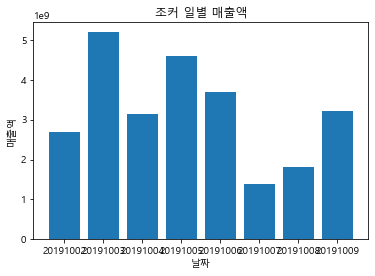

In [19]:
# 일별 매출액을 막대 그래프로 나타내기
mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
# plt.bar(temp['targetDt'], temp['salesAmt'])
plt.bar(temp['targetDt'].astype(str), temp['salesAmt'])
plt.title('조커 일별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10)
url1='' + title + ' 일별 매출액 막대 그래프' + '.png'
plt.savefig(url1)

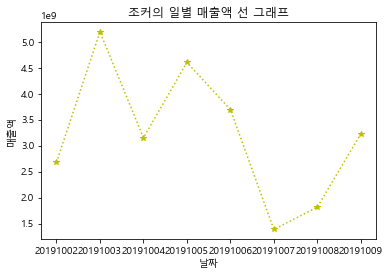

In [20]:
mpl.rc('font', family='Malgun Gothic')
plt.plot(temp['targetDt'].astype(str), temp['salesAmt'], 'y*:')
plt.title('{}의 일별 매출액 선 그래프'.format(temp.iloc[0,5]))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10)
plt.show()

In [21]:
temp = df.groupby('movieNm').sum()    # 가져온 30일치 데이터를 'movieNm'기준으로 묶어줌
temp

,rnum,rank,rankInten,movieCd,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
movieNm,,,,,,,,,,,,,,,,
47미터 2,27,27,0.0,60580995,60572921,67002650,4.9,-1341170,-1.2,11386626079,12377,-222,-2.9,1437552,488,1036
가장 보통의 연애,25,25,0.0,181763280,181718968,12738417230,204.0,1871071260,13152.4,59992056610,1497897,216275,9689.3,7065685,8229,40119
그것: 두 번째 이야기,86,86,0.0,282699256,282672836,1227260340,35.7,-212821110,101.9,66610363968,142437,-25796,78.3,7705886,3563,6755
극장판 반지의 비밀일기,39,39,0.0,100970225,100954565,428979030,4.1,123032600,1311.6,1212566620,52655,15159,1099.8,148758,1960,2553
극장판 헬로카봇 : 달나라를 구해줘!,115,115,0.0,323101136,323054688,1941805450,29.7,-4646190,2556.6,60292464310,245162,-1136,2451.0,7793947,5979,9713
나쁜 녀석들: 더 무비,90,90,0.0,585473750,585537356,39355251544,757.2,-29861040,2285.7,876179054392,4547418,-2389,2127.2,100599500,25866,113339
더 룸,61,61,0.0,161567744,161527489,399678100,15.0,43028100,2529.9,1943865500,49291,5366,3298.6,248272,1093,3620
레드슈즈,10,10,0.0,20198323,20190917,10856500,0.5,4789000,78.9,6051170190,1416,558,65.0,811538,11,13
레플리카,45,45,0.0,100976015,100954709,188169280,9.0,14848470,28.9,856546020,25397,2196,10.7,113960,1685,3739


양자물리학
Index(['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')
   rnum  rank   rankInten rankOldAndNew   movieCd        movieNm      openDt  \
0     1     1         NaN           OLD  20199950             조커  2019-10-02   
1     2     2         NaN           OLD  20195920      가장 보통의 연애  2019-10-02   
2     3     3         NaN           OLD  20191183          제미니 맨  2019-10-09   
3     4     4         NaN           OLD  20184483           퍼펙트맨  2019-10-02   
4     5     5         NaN           OLD  20193601  장사리 : 잊혀진 영웅들  2019-09-25   

   targetDt    salesAmt  salesShare  salesInten  salesChange     salesAcc  \
0  20191009  3230028370        45.2  1410826620         77.6  25789107670   
1  20191009  1849824260        25.9   840089640         83.2  12780656730   
2 

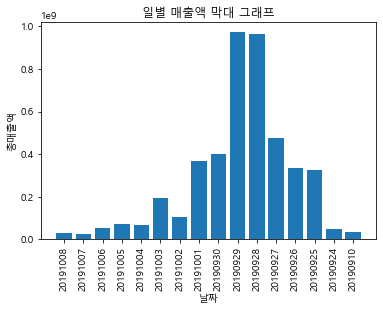

In [22]:
def graph_m(title):
    df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
    print(title)
    print(df.columns)
    print(df.head())
    temp = df[df['movieNm'] == title]
    #print(temp[['salesAmt','targetDt','movieNm']])
    #print(temp.dtypes)
    mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
    plt.bar(temp['targetDt'].astype(str),temp['salesAmt']) 
    plt.title('일별 매출액 막대 그래프')
    plt.xlabel('날짜')
    plt.ylabel('총매출액')
    plt.xticks(fontsize=10, rotation=90)
    url1="" + title + ".png"
    plt.savefig(url1)

if __name__ == "__main__":
    graph_m("양자물리학")

In [26]:
df1 = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df2 = pd.read_csv(r'cine.csv',engine='python',encoding='utf-8')
df3 = pd.merge(df1, df2, on='movieCd') 
df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1], inplace=True)
df3.iloc['targetDt', 'rank', 'rankOldAndNew', 'movieCd', 'salesAmt', 'audiCnt', 'showTm', 'actors', 'showTypes']
temp = df3.corr()
temp

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [24]:
# 이름을 한글로 바꿔줌
temp = temp.rename(index={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp = temp.rename(columns={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp

,rnum,순위,rankInten,신규진입여부,영화코드,날짜,매출액,salesShare,salesInten,salesChange,salesAcc,관객수,audiInten,audiChange,audiAcc,scrnCnt,showCnt,배우 수,상영시간,상영형태 수
rnum,1.000000,1.000000,NaN,0.215013,-0.002342,0.000000,-0.586906,-0.789609,-0.069411,-0.136005,-0.132405,-0.603175,-0.073375,-0.145290,-0.125669,-0.877812,-0.852888,-0.153723,-0.130745,0.018679
순위,1.000000,1.000000,NaN,0.215013,-0.002342,0.000000,-0.586906,-0.789609,-0.069411,-0.136005,-0.132405,-0.603175,-0.073375,-0.145290,-0.125669,-0.877812,-0.852888,-0.153723,-0.130745,0.018679
rankInten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
신규진입여부,0.215013,0.215013,NaN,1.000000,0.061381,0.048565,-0.115141,-0.157172,0.010028,-0.024313,-0.152938,-0.118817,0.011575,-0.026811,-0.152455,-0.236017,-0.198182,-0.239578,-0.096871,-0.034552
영화코드,-0.002342,-0.002342,NaN,0.061381,1.000000,0.367234,0.046422,0.079449,0.043543,-0.020701,-0.319629,0.050744,0.044928,-0.003214,-0.318485,0.030932,0.029337,-0.158472,-0.160596,-0.246553
날짜,0.000000,0.000000,NaN,0.048565,0.367234,1.000000,0.040801,0.008354,0.033585,-0.028261,-0.109911,0.044380,0.032756,-0.028557,-0.109138,0.005243,0.020489,-0.096962,-0.128396,-0.180821
매출액,-0.586906,-0.586906,NaN,-0.115141,0.046422,0.040801,1.000000,0.802502,0.311995,0.149676,0.071819,0.998837,0.305768,0.149119,0.064545,0.741710,0.796260,-0.002994,0.050115,-0.021838
salesShare,-0.789609,-0.789609,NaN,-0.157172,0.079449,0.008354,0.802502,1.000000,0.097335,0.202338,0.136984,0.819006,0.104578,0.209835,0.127352,0.882652,0.947588,0.022478,0.075964,-0.051775
salesInten,-0.069411,-0.069411,NaN,0.010028,0.043543,0.033585,0.311995,0.097335,1.000000,0.365076,-0.095586,0.315395,0.994680,0.377599,-0.092532,0.082029,0.094289,-0.030271,-0.005254,-0.001522
salesChange,-0.136005,-0.136005,NaN,-0.024313,-0.020701,-0.028261,0.149676,0.202338,0.365076,1.000000,-0.062641,0.167573,0.400662,0.988622,-0.061805,0.168091,0.173741,0.026730,0.032915,-0.016163
